<a href="https://colab.research.google.com/github/LukegCashman/Cashman_ECGR4105/blob/main/LC_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# SECTION 0: Initialize data sets

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import math
from sklearn.svm import SVC
from sklearn.svm import SVR

In [3]:
# Import Cancer data set
from sklearn.datasets import load_breast_cancer

# Read the data from Cancer set
cancer = load_breast_cancer()
cancer_data = cancer.data
cancer_data.shape
cancer_input = pd.DataFrame(cancer_data)
cancer_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
cancer_labels = cancer.target
labels = np.reshape(cancer_labels,(569,1))
final_cancer_data = np.concatenate([cancer_input,labels],axis=1)

In [5]:
# randomize the training and validation data split for Cancer set
np.random.seed(0)
cancer_train, cancer_validate = train_test_split(final_cancer_data, train_size = 0.8, test_size = 0.2, random_state = 100)

In [6]:
# Standardize Cancer training and validation sets
object = StandardScaler()
sd_trainC = object.fit_transform(cancer_train)
sd_validateC = object.fit_transform(cancer_validate)

In [7]:
# Count number of samples in each Cancer set
SizeC = len(cancer_input)
TrainSizeC = len(sd_trainC)
ValidSizeC = len(sd_validateC)
print(SizeC)
print(TrainSizeC)
print(ValidSizeC)

569
455
114


In [8]:
# Seperate X and Y variables from Cancer training and validation sets
X_trainC = sd_trainC[:,0:29]
X_validC = sd_validateC[:,0:29]

Y_trainC = cancer_train[:,30]
Y_validC = cancer_validate[:,30]

In [9]:
# Pull the csv file for Housing from github
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv'

# Read the data from Housing
df = pd.read_csv(url)

# Convert strings to numbers
df['mainroad'] = df['mainroad'].map({'yes':1 ,'no':0})
df['guestroom'] = df['guestroom'].map({'yes':1 ,'no':0})
df['basement'] = df['basement'].map({'yes':1 ,'no':0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes':1 ,'no':0})
df['airconditioning'] = df['airconditioning'].map({'yes':1 ,'no':0})
df['prefarea'] = df['prefarea'].map({'yes':1 ,'no':0})
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished':1 ,'semi-furnished':0.5,'unfurnished':0})

# Print Housing to confirm there are no issues
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


In [10]:
# randomize the training and validation data split for Housing set
np.random.seed(0)
house_train, house_validate = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

# Graph X value
Xh = house_validate.values[:,1]

In [11]:
# Standardize Housing training and validation sets
sd_trainH = object.fit_transform(house_train)
sd_validateH = object.fit_transform(house_validate)

In [12]:
# Count number of samples in each housing set
SizeH = len(df)
TrainSizeH = len(sd_trainH)
ValidSizeH = len(sd_validateH)
print(SizeH)
print(TrainSizeH)
print(ValidSizeH)

545
436
109


In [13]:
# Seperate X and Y variables from Housing training and validation sets
X_trainH = sd_trainH[:,1:12]
X_validH = sd_validateH[:,1:12]

Y_trainH = house_train.values[:,0]
Y_validH = house_validate.values[:,0]

In [14]:
# SECTION 1: Problem 1

# Initialize SVM classifiers (each model was manually swapped out to change the graph below to remove redundunt code)
model1 = SVC(kernel='linear', class_weight='balanced')
model2 = SVC(kernel='poly', class_weight='balanced')
model3 = SVC(kernel='rbf', class_weight='balanced')
model4 = SVC(kernel='sigmoid', class_weight='balanced')

In [15]:
# Initialze N PCA components
N = 10;

In [16]:
AccuracyC = np.zeros(N)
RecallC = np.zeros(N)
PrecisionC = np.zeros(N)
F1ScoreC = np.zeros(N)

for n in range(N-1):
  pca = PCA(n_components=(n+1))
  principalComponentC = pca.fit_transform(X_trainC)
  validationComponentC = pca.fit_transform(X_validC)
  ModelC = model1.fit(principalComponentC, Y_trainC)
  PredC = ModelC.predict(validationComponentC)

  AccuracyC[n+1] = metrics.accuracy_score(Y_validC, PredC)
  RecallC[n+1] = metrics.recall_score(Y_validC, PredC)
  PrecisionC[n+1] = metrics.precision_score(Y_validC, PredC)
  F1ScoreC[n+1] = metrics.f1_score(Y_validC, PredC)

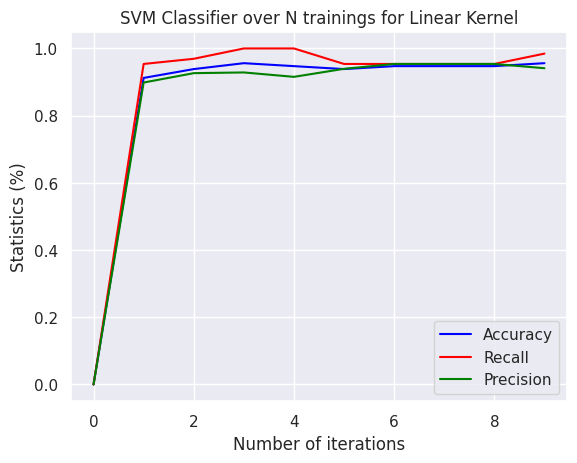

In [17]:
# Plot accuracy, Recall, Precision, F1 Score at each iteration for SVM classifier
plt.plot(range(0, N), AccuracyC, color='blue', label='Accuracy')
plt.plot(range(0, N), RecallC, color='red', label='Recall')
plt.plot(range(0, N), PrecisionC, color='green', label='Precision')

plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Statistics (%)')
plt.title('SVM Classifier over N trainings for Linear Kernel')
plt.legend()

plt.show()

In [18]:
# Print out best accuracy score, and corrosponding stats
print("SVM Accuracy =", AccuracyC[3])
print("SVM Precision =", PrecisionC[3])
print("SVM Recall =", RecallC[3])

SVM Accuracy = 0.956140350877193
SVM Precision = 0.9285714285714286
SVM Recall = 1.0


In [19]:
# SECTION 2: Problem 2

# Initialize SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

# Obtain predictions for each kernel type
y_rbf = svr_rbf.fit(X_trainH, Y_trainH).predict(X_validH)
y_lin = svr_lin.fit(X_trainH, Y_trainH).predict(X_validH)
y_poly = svr_poly.fit(X_trainH, Y_trainH).predict(X_validH)

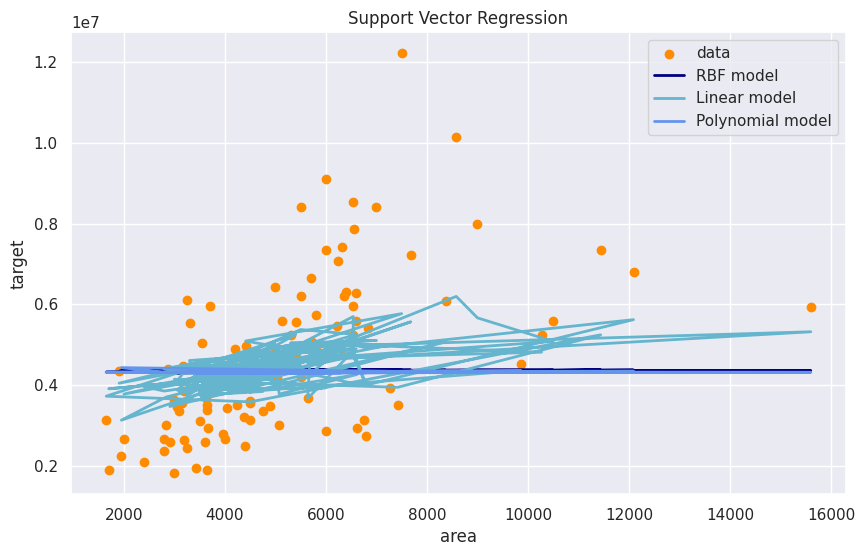

In [37]:
# Plot the results for SVR Regression
lw = 2
plt.scatter(Xh, Y_validH, color='darkorange', label='data')
plt.plot(Xh, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(Xh, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(Xh, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('area')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [21]:
# Create function to compute error
def comp_error(predictions, y):
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * 109) * np.sum(sqrErrors)
    return J

In [22]:
# Calculate loss of each model
lin_model_loss = comp_error(y_lin, Y_validH)
rbf_model_loss = comp_error(y_rbf, Y_validH)
poly_model_loss = comp_error(y_poly, Y_validH)

print("SVR Linear Loss =", lin_model_loss)
print("SVR RBF Loss =", rbf_model_loss)
print("SVR Poly Loss =", poly_model_loss)

SVR Linear Loss = 1068439483735.3754
SVR RBF Loss = 1778993645831.04
SVR Poly Loss = 1807014166647.6042


In [33]:
# Initialze K PCA components
K = 10;

In [34]:
rbf_loss = np.zeros(K)
lin_loss = np.zeros(K)
poly_loss = np.zeros(K)

for k in range(K-1):
  pca = PCA(n_components=(k+1))
  principalComponentH = pca.fit_transform(X_trainH)
  validationComponentH = pca.fit_transform(X_validH)
  y_rbf = svr_rbf.fit(principalComponentH, Y_trainH).predict(validationComponentH)
  y_lin = svr_lin.fit(principalComponentH, Y_trainH).predict(validationComponentH)
  y_poly = svr_poly.fit(principalComponentH, Y_trainH).predict(validationComponentH)

  rbf_loss[k+1] = comp_error(y_rbf, Y_validH)
  lin_loss[k+1] = comp_error(y_lin, Y_validH)
  poly_loss[k+1] = comp_error(y_poly, Y_validH)

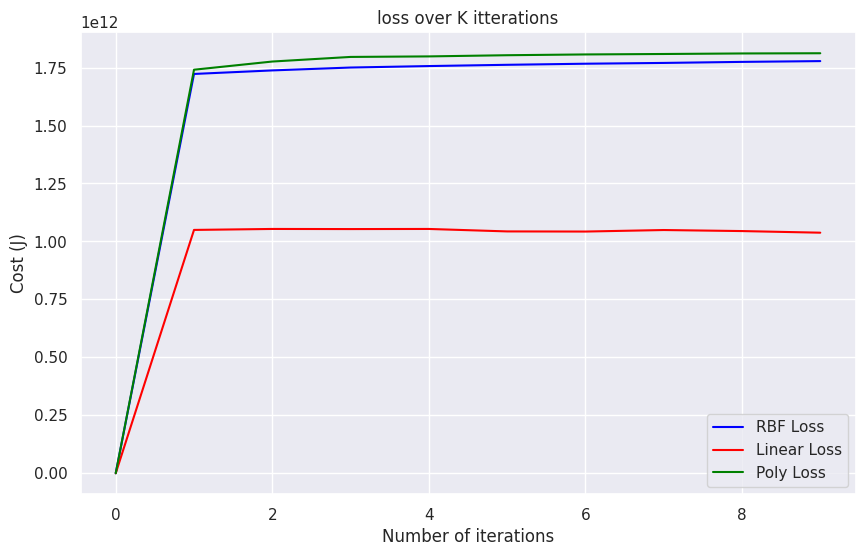

In [35]:
# Plot cost at each iteration
plt.plot(range(0, K), rbf_loss, color='blue', label='RBF Loss')
plt.plot(range(0, K), lin_loss, color='red', label='Linear Loss')
plt.plot(range(0, K), poly_loss, color='green', label='Poly Loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('loss over K itterations')
plt.legend()

plt.show()

In [36]:
# Print out best loss score for each model
print("SVR Linear Loss =", lin_loss[1])
print("SVR RBF Loss =", rbf_loss[1])
print("SVR Poly Loss =", poly_loss[1])

SVR Linear Loss = 1049650413246.3843
SVR RBF Loss = 1722478245188.373
SVR Poly Loss = 1740764545562.9175
